In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from tensorflow.keras import layers, models
from tensorflow.keras.applications import inception_v3
from tensorflow.keras import initializers
from tensorflow.keras import optimizers
from tensorflow import keras

In [2]:
train_dir= '../input/yawn-eye-dataset-new/dataset_new/train'
test_d= '../input/yawn-eye-dataset-new/dataset_new/test'

In [3]:
train_datagen = ImageDataGenerator(rescale =1./255, zoom_range=0.2, rotation_range=20,horizontal_flip=True,
                                   shear_range=0.2,width_shift_range=0.2,
                                   validation_split=0.3)
train= train_datagen.flow_from_directory(train_dir,target_size=(150,150), class_mode ='sparse',
                                         subset = 'training')
valid= train_datagen.flow_from_directory(train_dir,target_size=(150,150), class_mode ='sparse',
                                         subset = 'validation',)
test_datagen = ImageDataGenerator(rescale=1./255)
test = test_datagen.flow_from_directory(test_d, target_size =(150,150), class_mode = 'sparse')

Found 1728 images belonging to 4 classes.
Found 739 images belonging to 4 classes.
Found 433 images belonging to 4 classes.


In [4]:
print(train.class_indices)
print(valid.class_indices)
print(test.class_indices)

{'Closed': 0, 'Open': 1, 'no_yawn': 2, 'yawn': 3}
{'Closed': 0, 'Open': 1, 'no_yawn': 2, 'yawn': 3}
{'Closed': 0, 'Open': 1, 'no_yawn': 2, 'yawn': 3}


In [5]:
conv_base = inception_v3.InceptionV3(weights = 'imagenet', include_top=False,
                                     input_shape =(150,150,3))

2022-05-27 09:12:51.801188: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-05-27 09:12:51.901823: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-05-27 09:12:51.902700: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-05-27 09:12:51.903896: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

87924736/87910968 [==============================] - 1s 0us/step


In [19]:
model = models.Sequential()

model.add(conv_base)

model.add(layers.Conv2D(512, kernel_size=(2,2), padding='same', strides=(1,1),activation= 'relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.5))


model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.BatchNormalization())


model.add(layers.Dense(500,kernel_initializer=initializers.HeNormal(seed=1678),
                 bias_initializer = initializers.HeUniform(seed=1879),activation= 'relu'))
model.add(layers.Dropout(0.5))
model.add(layers.BatchNormalization())


model.add(layers.Dense(300,kernel_initializer=initializers.HeNormal(seed=67),
                 bias_initializer = initializers.HeUniform(seed=89),activation= 'relu'))
model.add(layers.Dropout(0.75))
model.add(layers.BatchNormalization())




model.add(layers.Dense(4,kernel_initializer=initializers.HeNormal(seed=78),
                 bias_initializer = initializers.HeUniform(seed=79), activation='softmax'))

conv_base.trainable = False
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inception_v3 (Functional)    (None, 3, 3, 2048)        21802784  
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 3, 3, 512)         4194816   
_________________________________________________________________
batch_normalization_4 (Batch (None, 3, 3, 512)         2048      
_________________________________________________________________
dropout_4 (Dropout)          (None, 3, 3, 512)         0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 4608)              0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 4608)              0         
_________________________________________________________________
batch_normalization_5 (Batch (None, 4608)             

In [17]:
del model
keras.backend.clear_session()

In [20]:
model.compile(loss = 'SparseCategoricalCrossentropy', optimizer = optimizers.RMSprop(lr=2e-4,),
              metrics=['accuracy'])
checkpoint_callbacks = keras.callbacks.ModelCheckpoint('drowsiness.h5', save_best_only=True)
early_stopping_callbacks = keras.callbacks.EarlyStopping(patience=20, restore_best_weights=True)

In [21]:
model_history = model.fit_generator(train, epochs =100, validation_data = valid,
                                   callbacks = [checkpoint_callbacks, early_stopping_callbacks])

Epoch 1/100
54/54 [==============================] - 34s 535ms/step - loss: 1.5106 - accuracy: 0.4097 - val_loss: 0.6479 - val_accuracy: 0.6373
Epoch 2/100
54/54 [==============================] - 26s 492ms/step - loss: 1.0606 - accuracy: 0.5550 - val_loss: 0.5311 - val_accuracy: 0.7104
Epoch 3/100
54/54 [==============================] - 24s 443ms/step - loss: 0.8307 - accuracy: 0.6412 - val_loss: 0.4561 - val_accuracy: 0.7415
Epoch 4/100
54/54 [==============================] - 25s 455ms/step - loss: 0.7382 - accuracy: 0.6748 - val_loss: 0.4474 - val_accuracy: 0.7415
Epoch 5/100
54/54 [==============================] - 25s 461ms/step - loss: 0.6549 - accuracy: 0.7083 - val_loss: 0.4183 - val_accuracy: 0.7321
Epoch 6/100
54/54 [==============================] - 25s 459ms/step - loss: 0.5858 - accuracy: 0.7384 - val_loss: 0.3755 - val_accuracy: 0.7618
Epoch 7/100
54/54 [==============================] - 24s 450ms/step - loss: 0.5530 - accuracy: 0.7431 - val_loss: 0.3739 - val_accuracy:

In [22]:
model.evaluate(test)

14/14 [==============================] - 3s 198ms/step - loss: 0.3186 - accuracy: 0.8337


[0.3185594379901886, 0.8337182402610779]

<AxesSubplot:title={'center':'Train v/s Validation Accuracy'}, xlabel='Number of Epochs', ylabel='Accuracy'>

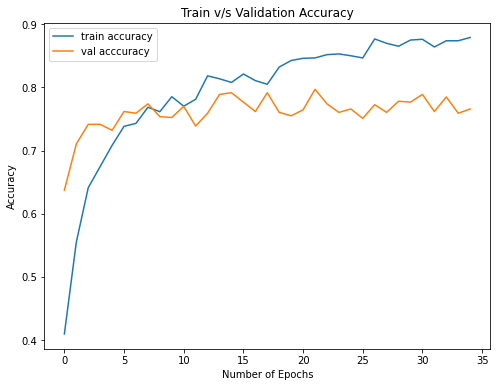

In [23]:
pd.DataFrame({'train accuracy': model_history.history['accuracy'], 
                  'val acccuracy': model_history.history['val_accuracy']}).plot(figsize=(8,6),
                   title ='Train v/s Validation Accuracy', xlabel='Number of Epochs',
                                                           ylabel='Accuracy')

<AxesSubplot:title={'center':'Train v/s Validation Loss'}, xlabel='Number of Epochs', ylabel='Loss'>

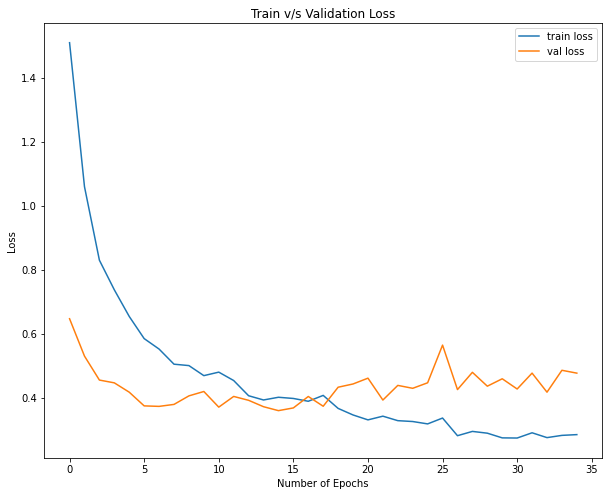

In [25]:
pd.DataFrame({'train loss':model_history.history['loss'], 
                  'val loss': model_history.history['val_loss']}).plot(figsize=(10,8),
                    title ='Train v/s Validation Loss', xlabel='Number of Epochs',
                                                           ylabel='Loss')

In [54]:
def drowsiness_classifier(image):
    dict ={'Closed': 0, 'Open': 1, 'no_yawn': 2, 'yawn': 3}
    img = load_img(image, target_size=(150,150))
    tst_im = img_to_array(img)
    test_image = tst_im/255
    test_image= np.expand_dims(test_image, axis=0)
    pred_val=np.argmax(model.predict(test_image))
    for key in dict.keys():
        if dict[key] == pred_val:
            print('The person in the image is: {}'.format(i))
    plt.imshow(test_image[0])

The person in the image is: yawn


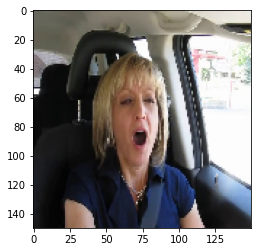

In [55]:
drowsiness_classifier('../input/yawn-eye-dataset-new/dataset_new/test/yawn/134.jpg')